# TSeries Package

#### Cargamos las librerías auxiliares

In [1]:
library(ggplot2)
library(zoo)
library(forecast)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'zoo' was built under R version 3.3.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



#### Cargamos TSeries

In [2]:
#install.packages('tseries')
library(tseries)

Warning message:
"package 'tseries' was built under R version 3.3.3"

#### Cargamos los datos

In [3]:
datos <- read.csv('monthly-traffic-fatalities-in-on.csv')
accidentes <- ts(datos, start = c(1960, 1), frequency = 12)
accidentes.zoo <- zoo(datos, order.by = seq.Date(from = as.Date('1960/01/01'), by = 'month',
                                             length.out = nrow(datos)), frequency = 12)
colnames(accidentes.zoo) <- 'accidentes'

#### Función genérica para plotting de test vs pred a través de ggplot2

In [4]:
combine <- function(test, pred) {
  require(ggplot2)
  p <- ggplot() +
    geom_line(aes(x = index(as.zoo(test)), y = coredata(as.zoo(test)), colour = 'Test')) +
    geom_line(aes(x = index(as.zoo(test)), y = pred, colour = 'Prediccion')) +
    scale_color_manual(name = 'Leyenda', values = c('Test' = 'black', 'Prediccion' = 'red'),
                       labels = c('Test','Prediccion'))
  p
}

#### Ajustamos estacionalmente la serie y volvemos a dividir en dos conjuntos

In [5]:
decomposition <- decompose(accidentes, type = 'additive')
accidentes.adj <- seasadj(decomposition) # Forecast
acc.train.adj <- window(accidentes.adj, start = c(1960,1), end = c(1973,12))
acc.test.adj <- window(accidentes.adj, start = c(1974,1))

#### Plotting con ggplot del training y el test

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


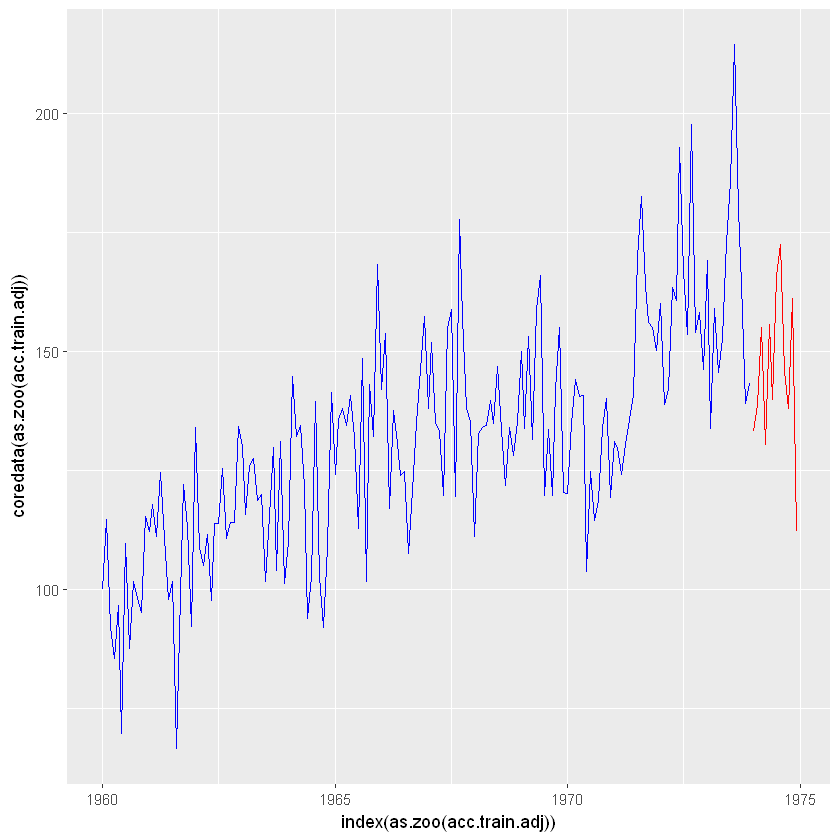

In [6]:
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.adj)), y = coredata(as.zoo(acc.train.adj))), col = 'blue') +
  geom_line(aes(x = index(as.zoo(acc.test.adj)), y = coredata(as.zoo(acc.test.adj))), col = 'red')
p

#### ¿Es estacionaria?

In [7]:
adf.test(acc.train.adj, alternative = 'stationary') # Es estacionaria

Warning message in adf.test(acc.train.adj, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  acc.train.adj
Dickey-Fuller = -4.7501, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


In [8]:
adf.test(acc.train.adj, alternative = 'explosive') # No es explosiva

Warning message in adf.test(acc.train.adj, alternative = "explosive"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  acc.train.adj
Dickey-Fuller = -4.7501, Lag order = 5, p-value = 0.99
alternative hypothesis: explosive


In [9]:
pp.test(acc.train.adj, alternative = 'stationary') # Es estacionaria

Warning message in pp.test(acc.train.adj, alternative = "stationary"):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  acc.train.adj
Dickey-Fuller Z(alpha) = -127.76, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


In [10]:
pp.test(acc.train.adj, alternative = 'explosive') # No es explosiva

Warning message in pp.test(acc.train.adj, alternative = "explosive"):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  acc.train.adj
Dickey-Fuller Z(alpha) = -127.76, Truncation lag parameter = 4, p-value
= 0.99
alternative hypothesis: explosive


In [11]:
kpss.test(acc.train.adj, null = 'Trend') # 0.055


	KPSS Test for Trend Stationarity

data:  acc.train.adj
KPSS Trend = 0.14327, Truncation lag parameter = 2, p-value = 0.05506


#### Diferenciamos para hacerla estacionaria en tendencia (evidencias visuales)

In [12]:
accidentes.dif.adj <- diff(accidentes.adj) 
acc.train.dif.adj <- window(accidentes.dif.adj, start = c(1960,2), end = c(1973,12)) # Perdemos una observación
acc.test.dif.adj <- window(accidentes.dif.adj, start = c(1974,1))

#### Repetimos los tests

In [13]:
adf.test(acc.train.dif.adj, alternative = 'stationary') # Es estacionaria

Warning message in adf.test(acc.train.dif.adj, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  acc.train.dif.adj
Dickey-Fuller = -7.3046, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


In [14]:
adf.test(acc.train.dif.adj, alternative = 'explosive') # No es explosiva

Warning message in adf.test(acc.train.dif.adj, alternative = "explosive"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  acc.train.dif.adj
Dickey-Fuller = -7.3046, Lag order = 5, p-value = 0.99
alternative hypothesis: explosive


In [15]:
pp.test(acc.train.adj, alternative = 'stationary') # Es estacionaria

Warning message in pp.test(acc.train.adj, alternative = "stationary"):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  acc.train.adj
Dickey-Fuller Z(alpha) = -127.76, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


In [16]:
pp.test(acc.train.adj, alternative = 'explosive') # No es explosiva

Warning message in pp.test(acc.train.adj, alternative = "explosive"):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  acc.train.adj
Dickey-Fuller Z(alpha) = -127.76, Truncation lag parameter = 4, p-value
= 0.99
alternative hypothesis: explosive


In [17]:
kpss.test(acc.train.dif.adj, null = 'Trend') # Es estacionaria en tendencia

Warning message in kpss.test(acc.train.dif.adj, null = "Trend"):
"p-value greater than printed p-value"


	KPSS Test for Trend Stationarity

data:  acc.train.dif.adj
KPSS Trend = 0.01118, Truncation lag parameter = 2, p-value = 0.1


#### Plotting con ggplot del nuevo training y el test

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


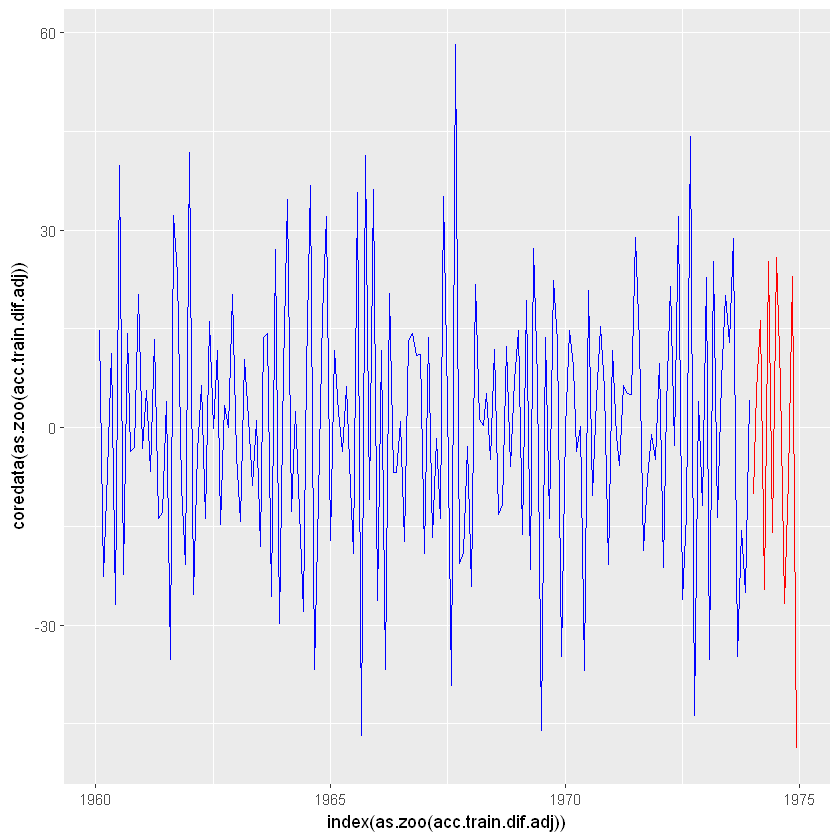

In [18]:
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)), y = coredata(as.zoo(acc.train.dif.adj))), col = 'blue') +
  geom_line(aes(x = index(as.zoo(acc.test.dif.adj)), y = coredata(as.zoo(acc.test.dif.adj))), col = 'red')
p

#### Linealidad en media

In [19]:
terasvirta.test(acc.train.dif.adj) # Es lineal en media


	Teraesvirta Neural Network Test

data:  acc.train.dif.adj
X-squared = 0.21309, df = 2, p-value = 0.8989


In [20]:
white.test(acc.train.adj) # Es lineal en media


	White Neural Network Test

data:  acc.train.adj
X-squared = 0.24774, df = 2, p-value = 0.8835


#### Calculamos la mayor diferencia en las diferencias

In [22]:
maxdrawdown(acc.train.dif.adj)
acc.train.dif.adj.drop <- window(acc.train.dif.adj, start = c(1967, 9), end = c(1969, 7))

$maxdrawdown
[1] 104.3482

$from
[1] 92

$to
[1] 114

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


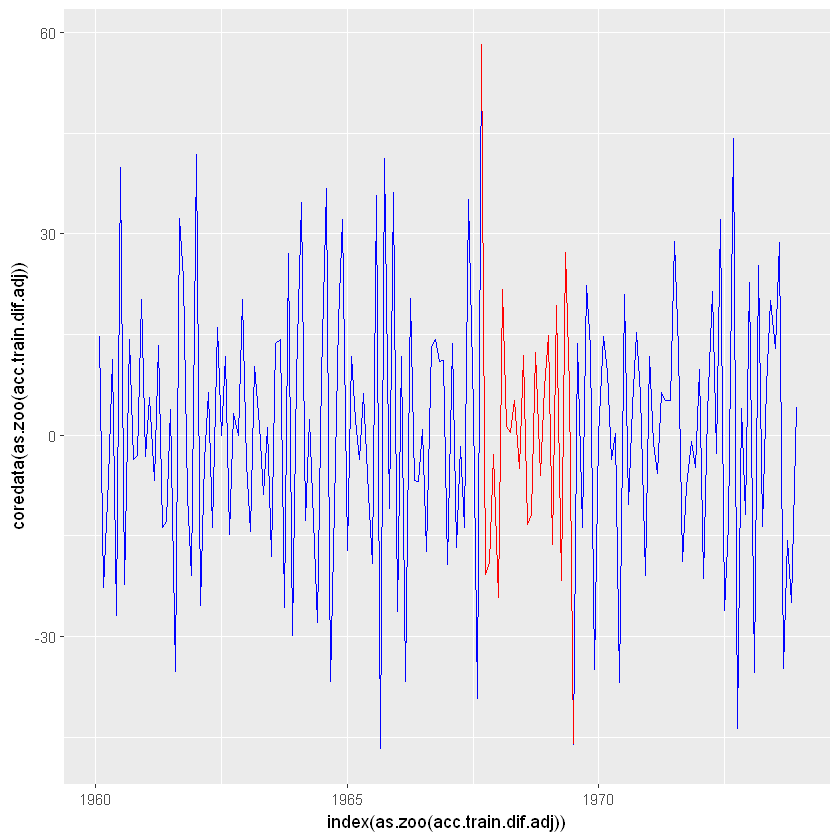

In [23]:
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)),
                y = coredata(as.zoo(acc.train.dif.adj))), col = 'blue') +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj.drop)),
                y = coredata(as.zoo(acc.train.dif.adj.drop))), col = 'red')
p

#### Bootstrap

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


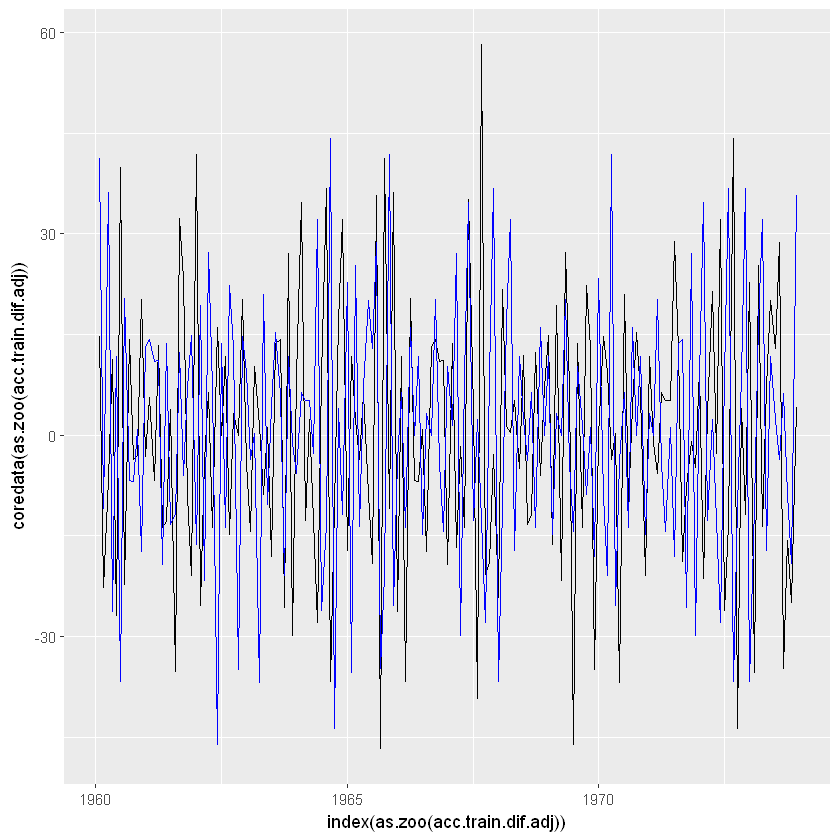

In [24]:
boots.block <- tsbootstrap(acc.train.dif.adj, type = 'block')
boots.stationary <- tsbootstrap(acc.train.dif.adj, type = 'stationary')

p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)),
                y = coredata(as.zoo(acc.train.dif.adj))), col = 'black') +
  geom_line(aes(x = index(as.zoo(boots.block)), y = coredata(as.zoo(boots.block))), col = 'blue')
p

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


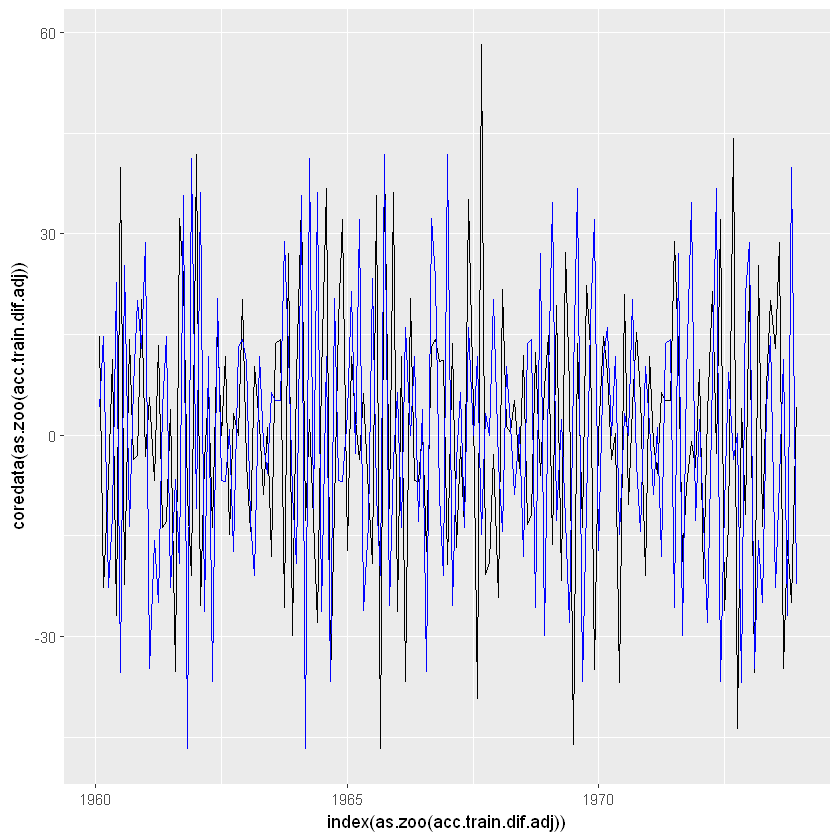

In [25]:
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)),
                y = coredata(as.zoo(acc.train.dif.adj))), col = 'black') +
  geom_line(aes(x = index(as.zoo(boots.stationary)), y = coredata(as.zoo(boots.stationary))), col = 'blue')
p

In [26]:
initial.acf <- function(serie) {
  return(acf(serie, plot = FALSE)$acf[2:8])
}

tsbootstrap(acc.train.dif.adj, nb= 500, type = 'stationary',
            statistic = initial.acf)


Call:
tsbootstrap(x = acc.train.dif.adj, nb = 500, statistic = initial.acf, 
    type = "stationary")

Resampled Statistic(s):
   original      bias std. error
t1 -0.46105  0.033034    0.05237
t2  0.05999 -0.011985    0.08144
t3 -0.00991  0.001218    0.07900
t4 -0.11464  0.029676    0.08427
t5  0.07060 -0.014197    0.08352
t6 -0.01765  0.014046    0.07475
t7 -0.08207  0.018781    0.07285


#### Surrogate

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


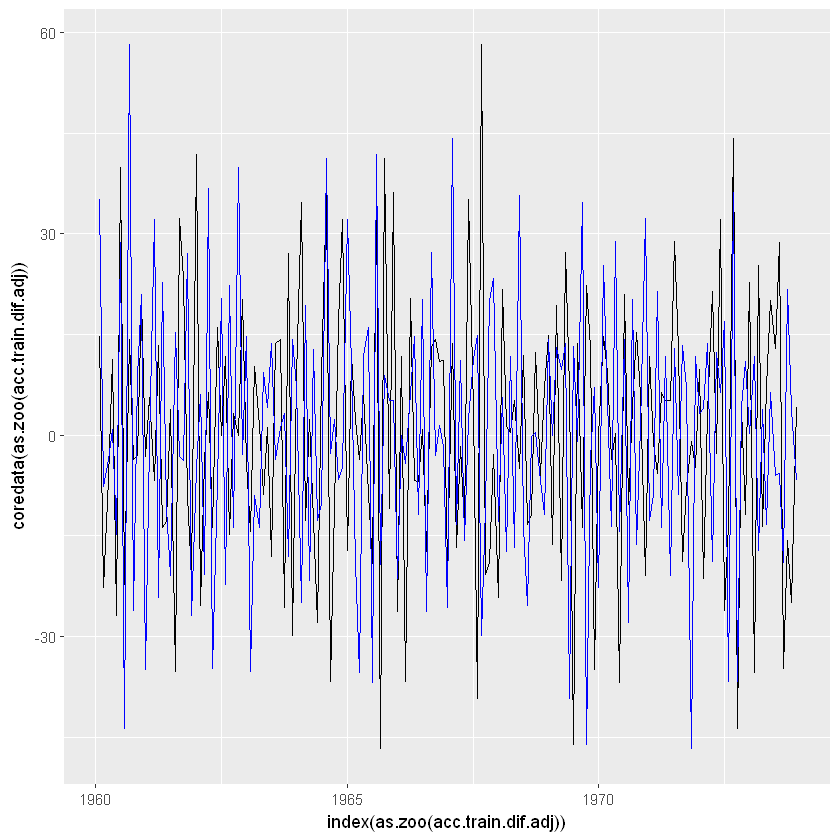

In [27]:
surr <- surrogate(acc.train.dif.adj, ns = 1, fft = TRUE, amplitude = TRUE)
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)),
                y = coredata(as.zoo(acc.train.dif.adj))), col = 'black') +
  geom_line(aes(x = index(as.zoo(surr)), y = coredata(as.zoo(surr))), col = 'blue')
p

#### Estudiamos los correlogramas

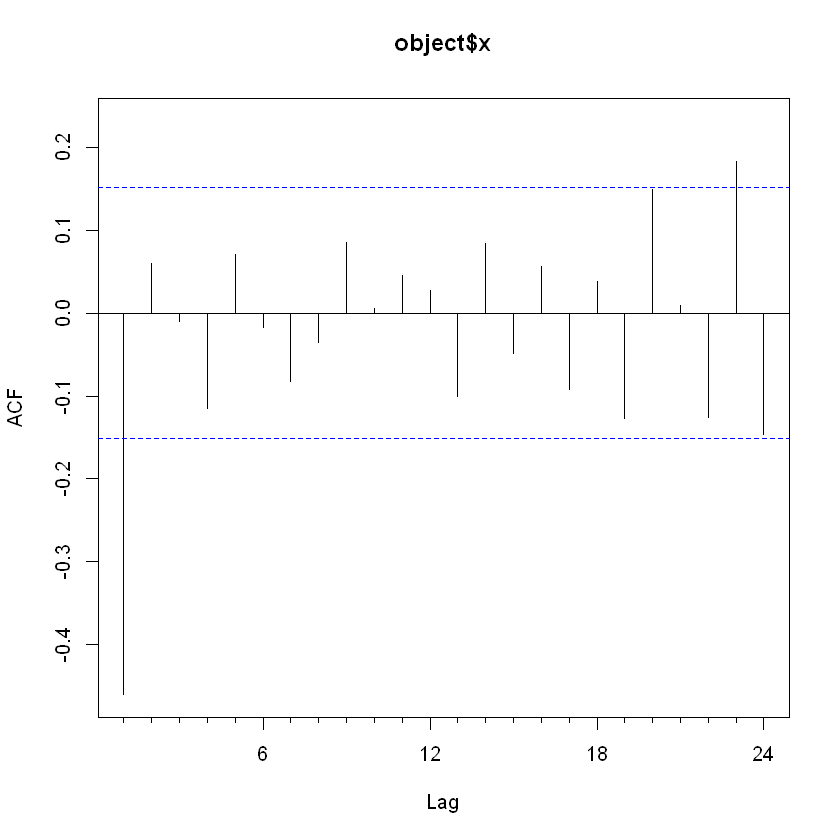

In [28]:
Acf(acc.train.dif.adj)

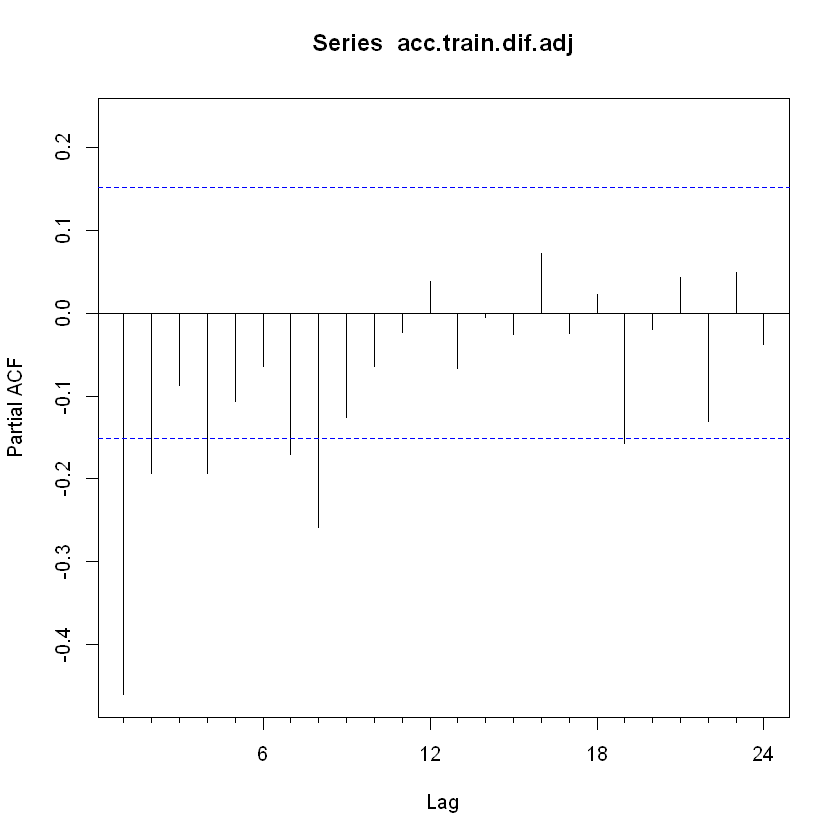

In [29]:
Pacf(acc.train.dif.adj)

#### Ajustamos un ARIMA(1,1,1)

In [30]:
model.1 <- arma(acc.train.dif.adj, order = c(1,1), include.intercept = FALSE) # AIC =  1419.3
summary(model.1)


Call:
arma(x = acc.train.dif.adj, order = c(1, 1), include.intercept = FALSE)

Model:
ARMA(1,1)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.253  -8.132   1.725  11.008  47.662 

Coefficient(s):
     Estimate  Std. Error  t value Pr(>|t|)    
ar1   0.18343     0.09343    1.963   0.0496 *  
ma1  -0.85834     0.05004  -17.153   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Fit:
sigma^2 estimated as 280.6,  Conditional Sum-of-Squares = 46678.99,  AIC = 1419.3


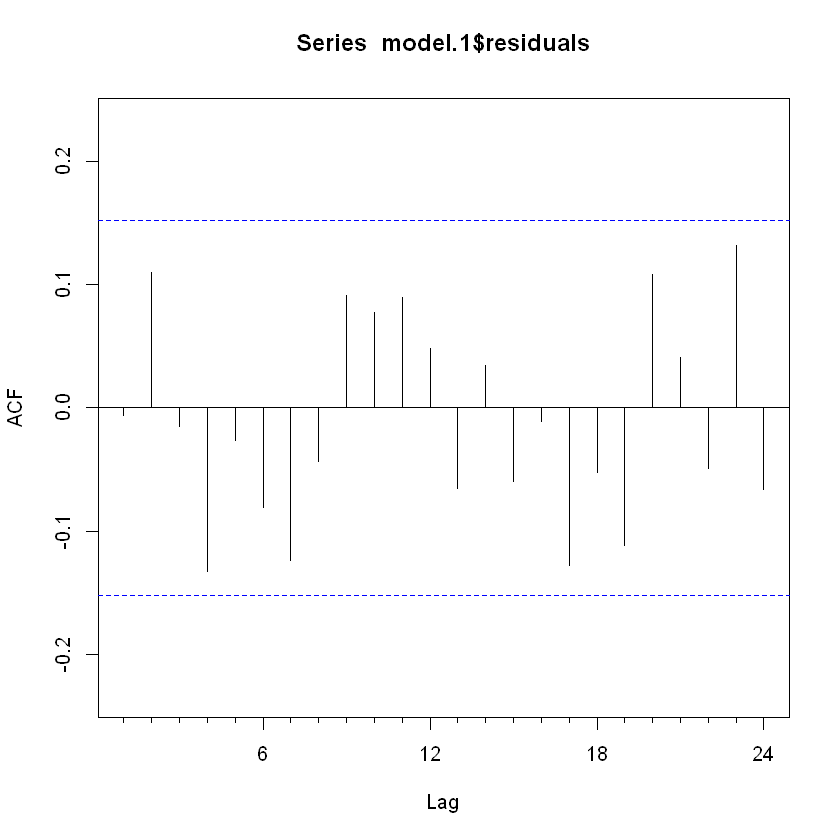

In [31]:
Acf(model.1$residuals)

In [32]:
jarque.bera.test(na.remove(model.1$residuals))


	Jarque Bera Test

data:  na.remove(model.1$residuals)
X-squared = 0.65899, df = 2, p-value = 0.7193


In [33]:
bds.test(na.remove(model.1$residuals))


	 BDS Test 

data:  na.remove(model.1$residuals) 

Embedding dimension =  2 3 

Epsilon for close points =   8.3757 16.7514 25.1271 33.5028 

Standard Normal = 
      [ 8.3757 ] [ 16.7514 ] [ 25.1271 ] [ 33.5028 ]
[ 2 ]    -0.4756     -0.9681     -0.7699     -0.9441
[ 3 ]    -0.1811     -0.0944     -0.4071     -0.7277

p-value = 
      [ 8.3757 ] [ 16.7514 ] [ 25.1271 ] [ 33.5028 ]
[ 2 ]     0.6344      0.3330      0.4413      0.3451
[ 3 ]     0.8563      0.9248      0.6839      0.4668



#### Ajustamos un ARIMA(2,1,1)

In [34]:
model.2 <- arma(acc.train.dif.adj, order = c(2,1), include.intercept = FALSE) # AIC = 1414.81
summary(model.2)


Call:
arma(x = acc.train.dif.adj, order = c(2, 1), include.intercept = FALSE)

Model:
ARMA(2,1)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.105  -6.418   2.156  11.723  46.680 

Coefficient(s):
     Estimate  Std. Error  t value Pr(>|t|)    
ar1   0.16314     0.08298    1.966   0.0493 *  
ar2   0.10838     0.08413    1.288   0.1976    
ma1  -0.86773     0.04236  -20.487   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Fit:
sigma^2 estimated as 269.1,  Conditional Sum-of-Squares = 45155.79,  AIC = 1414.29


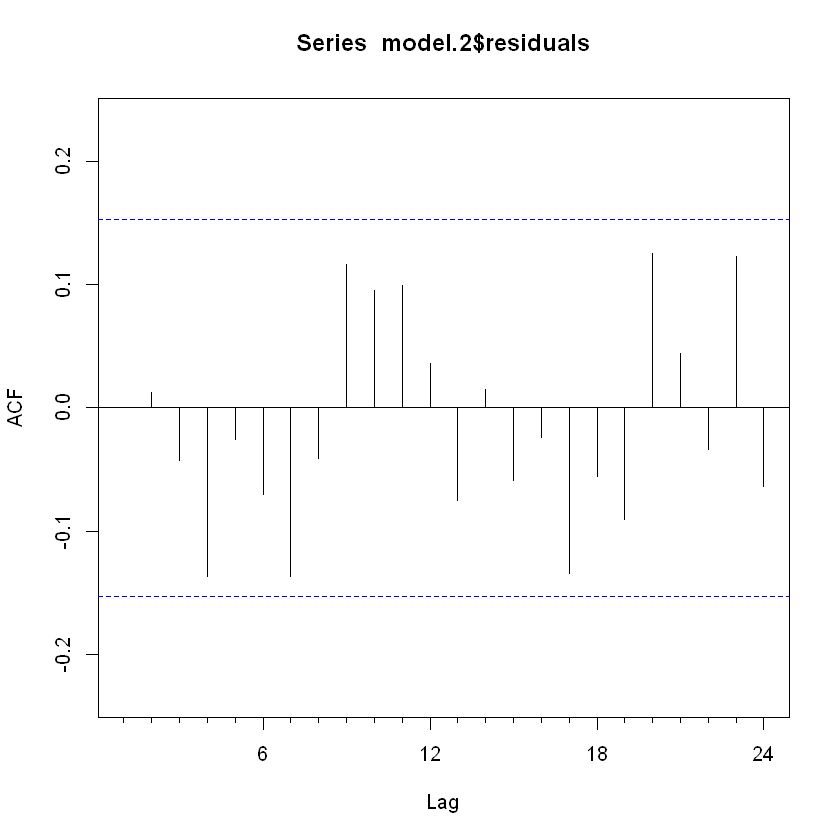

In [35]:
Acf(model.2$residuals)

In [36]:
jarque.bera.test(na.remove(model.2$residuals))


	Jarque Bera Test

data:  na.remove(model.2$residuals)
X-squared = 0.50151, df = 2, p-value = 0.7782


In [37]:
bds.test(na.remove(model.2$residuals))


	 BDS Test 

data:  na.remove(model.2$residuals) 

Embedding dimension =  2 3 

Epsilon for close points =   8.2018 16.4036 24.6054 32.8072 

Standard Normal = 
      [ 8.2018 ] [ 16.4036 ] [ 24.6054 ] [ 32.8072 ]
[ 2 ]    -1.0469     -1.2213     -1.4867     -1.8768
[ 3 ]    -0.7925     -0.7553     -1.1963     -1.7652

p-value = 
      [ 8.2018 ] [ 16.4036 ] [ 24.6054 ] [ 32.8072 ]
[ 2 ]     0.2952      0.2220      0.1371      0.0605
[ 3 ]     0.4281      0.4501      0.2316      0.0775



#### Graficamos ambos modelos

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 2 rows containing missing values (geom_path)."

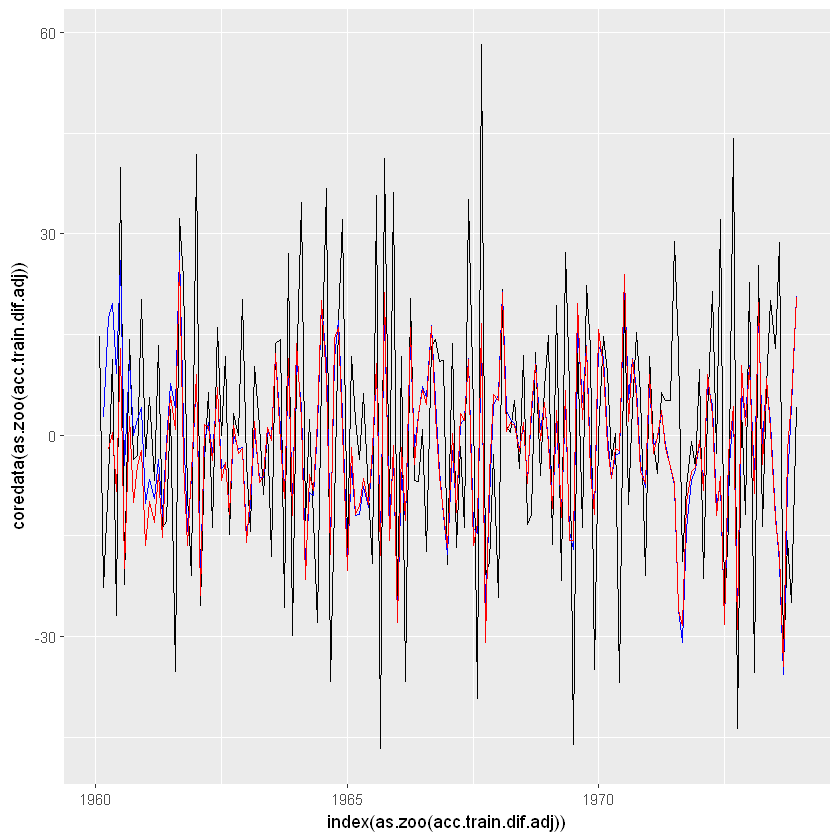

In [38]:
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)),
                y = coredata(as.zoo(acc.train.dif.adj))), col = 'black') +
  geom_line(aes(x = index(as.zoo(fitted(model.1))), y = coredata(as.zoo(fitted(model.1)))), col = 'blue') +
  geom_line(aes(x = index(as.zoo(fitted(model.2))), y = coredata(as.zoo(fitted(model.2)))), col = 'red')
p